In [3]:
import pandas  as pd

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
import seaborn as sns

In [15]:
train = pd.read_csv("data/train.csv", header = 0)

In [16]:
test = pd.read_csv("data/test.csv", header= 0)

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [18]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
train.Embarked = train.Embarked.replace (["C", "Q", "S"], [0, 1, 2])

In [21]:
train["Embarked"].fillna(train.Embarked.mean(), inplace=True)

In [23]:
train.Sex = train.Sex.replace(['male', 'female'], [0, 1])

In [24]:
train["Age"].fillna(train.Age.mean(), inplace=True)

In [25]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,NaN,2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C85,0.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,C123,2.0
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,NaN,2.0
5,6,0,3,"Moran, Mr. James",0,29.699118,0,0,330877,8.4583,NaN,1.0
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.000000,0,0,17463,51.8625,E46,2.0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.000000,3,1,349909,21.0750,NaN,2.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.000000,0,2,347742,11.1333,NaN,2.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.000000,1,0,237736,30.0708,NaN,0.0


In [26]:
corrmat = train.corr()

In [27]:
corrmat

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.033207,-0.057527,-0.001652,0.012658,0.013133
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.069809,-0.035322,0.081629,0.257307,-0.169411
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.331339,0.083081,0.018443,-0.549500,0.164226
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.084153,0.114631,0.245489,0.182333,-0.110092
Age,0.033207,-0.069809,-0.331339,-0.084153,1.000000,-0.232625,-0.179191,0.091566,-0.028819
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.232625,1.000000,0.414838,0.159651,0.068882
Parch,-0.001652,0.081629,0.018443,0.245489,-0.179191,0.414838,1.000000,0.216225,0.040438
Fare,0.012658,0.257307,-0.549500,0.182333,0.091566,0.159651,0.216225,1.000000,-0.226075
Embarked,0.013133,-0.169411,0.164226,-0.110092,-0.028819,0.068882,0.040438,-0.226075,1.000000


In [32]:
f, ax = plt.subplots(figsize=(12,9))

In [33]:
sns.heatmap(corrmat, vmax=.8, square=True)

In [34]:
split_data = []

In [467]:
for survived in [0,1]:
    split_data.append(df[df.Survived == survived])

In [468]:
split_data

[     Survived  Pclass  Sex   Age  SibSp  Parch            Ticket      Fare  \
 0           0       3    0  22.0      1      0         A/5 21171    7.2500   
 4           0       3    0  35.0      0      0            373450    8.0500   
 5           0       3    0   NaN      0      0            330877    8.4583   
 6           0       1    0  54.0      0      0             17463   51.8625   
 7           0       3    0   2.0      3      1            349909   21.0750   
 12          0       3    0  20.0      0      0         A/5. 2151    8.0500   
 13          0       3    0  39.0      1      5            347082   31.2750   
 14          0       3    1  14.0      0      0            350406    7.8542   
 16          0       3    0   2.0      4      1            382652   29.1250   
 18          0       3    1  31.0      1      0            345763   18.0000   
 20          0       2    0  35.0      0      0            239865   26.0000   
 24          0       3    1   8.0      3      1     

In [469]:
temp = [i["Pclass"].dropna() for i in split_data]

In [470]:
print(temp)

[0      3
4      3
5      3
6      1
7      3
12     3
13     3
14     3
16     3
18     3
20     2
24     3
26     3
27     1
29     3
30     1
33     2
34     1
35     1
37     3
38     3
40     3
41     2
42     3
45     3
46     3
48     3
49     3
50     3
51     3
      ..
844    3
845    3
846    3
847    3
848    2
850    3
851    3
852    3
854    2
859    3
860    3
861    2
863    3
864    2
867    1
868    3
870    3
872    1
873    3
876    3
877    3
878    3
881    3
882    3
883    2
884    3
885    3
886    2
888    3
890    3
Name: Pclass, Length: 549, dtype: int64, 1      1
2      3
3      1
8      3
9      2
10     3
11     1
15     2
17     2
19     3
21     2
22     3
23     1
25     3
28     3
31     1
32     3
36     3
39     3
43     2
44     3
47     3
52     1
53     2
55     1
56     2
58     2
61     1
65     3
66     2
      ..
809    1
820    1
821    3
823    3
827    2
828    3
829    1
830    3
831    2
835    1
838    3
839    1
842    1
849    1
853 

/Users/yamadahikaru/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


([array([  80.,   97.,  372.]), array([ 216.,  184.,  491.])],
 array([ 1.        ,  1.66666667,  2.33333333,  3.        ]),
 <a list of 2 Lists of Patches objects>)

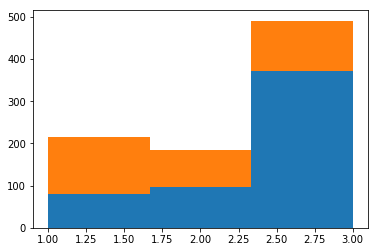

In [471]:
plt.hist(temp, histtype="barstacked", bins=3)

In [472]:
plt.show()

In [473]:
temp = [i["Age"].dropna() for i in split_data]

/Users/yamadahikaru/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


([array([ 13.,  13.,   8.,  63.,  80.,  66.,  47.,  39.,  30.,  23.,  14.,
          11.,  10.,   3.,   4.,   0.]),
  array([  44.,   20.,   19.,   96.,  122.,  108.,   88.,   67.,   47.,
           39.,   24.,   18.,   14.,    3.,    4.,    1.])],
 array([  0.42   ,   5.39375,  10.3675 ,  15.34125,  20.315  ,  25.28875,
         30.2625 ,  35.23625,  40.21   ,  45.18375,  50.1575 ,  55.13125,
         60.105  ,  65.07875,  70.0525 ,  75.02625,  80.     ]),
 <a list of 2 Lists of Patches objects>)

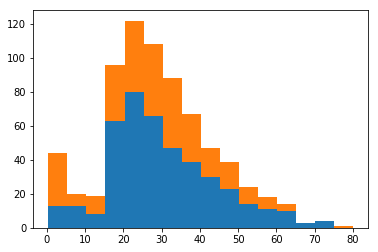

In [474]:
plt.hist(temp, histtype="barstacked", bins=16)

In [475]:
plt.show()

In [476]:
df["Familysize"] = df["SibSp"] + df["Parch"] + 1

In [477]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Familysize
0,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,2.0,2
1,1,1,1,38.0,1,0,PC 17599,71.2833,C85,0.0,2
2,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2.0,1
3,1,1,1,35.0,1,0,113803,53.1000,C123,2.0,2
4,0,3,0,35.0,0,0,373450,8.0500,NaN,2.0,1
5,0,3,0,NaN,0,0,330877,8.4583,NaN,1.0,1
6,0,1,0,54.0,0,0,17463,51.8625,E46,2.0,1
7,0,3,0,2.0,3,1,349909,21.0750,NaN,2.0,5
8,1,3,1,27.0,0,2,347742,11.1333,NaN,2.0,3
9,1,2,1,14.0,1,0,237736,30.0708,NaN,0.0,2


In [478]:
df = df.drop(["Embarked", "Ticket", "Cabin"], axis =1)

In [479]:
df.dtypes

Survived        int64
Pclass          int64
Sex             int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Familysize      int64
dtype: object

In [480]:
df = df.replace("male", 0).replace("female", 1)

In [481]:
df.dtypes

Survived        int64
Pclass          int64
Sex             int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Familysize      int64
dtype: object

In [482]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Familysize
0,0,3,0,22.0,1,0,7.2500,2
1,1,1,1,38.0,1,0,71.2833,2
2,1,3,1,26.0,0,0,7.9250,1
3,1,1,1,35.0,1,0,53.1000,2
4,0,3,0,35.0,0,0,8.0500,1
5,0,3,0,NaN,0,0,8.4583,1
6,0,1,0,54.0,0,0,51.8625,1
7,0,3,0,2.0,3,1,21.0750,5
8,1,3,1,27.0,0,2,11.1333,3
9,1,2,1,14.0,1,0,30.0708,2


In [483]:
df = df.dropna(subset=["Age"])

In [484]:
df["Survived"]

0      0
1      1
2      1
3      1
4      0
6      0
7      0
8      1
9      1
10     1
11     1
12     0
13     0
14     0
15     1
16     0
18     0
20     0
21     1
22     1
23     1
24     0
25     1
27     0
30     0
33     0
34     0
35     0
37     0
38     0
      ..
856    1
857    1
858    1
860    0
861    0
862    1
864    0
865    1
866    1
867    0
869    1
870    0
871    1
872    0
873    0
874    1
875    1
876    0
877    0
879    1
880    1
881    0
882    0
883    0
884    0
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 714, dtype: int64

In [485]:
train_labels = df["Survived"].values

In [486]:
train_labels

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1,

In [487]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Familysize
0,0,3,0,22.0,1,0,7.2500,2
1,1,1,1,38.0,1,0,71.2833,2
2,1,3,1,26.0,0,0,7.9250,1
3,1,1,1,35.0,1,0,53.1000,2
4,0,3,0,35.0,0,0,8.0500,1
6,0,1,0,54.0,0,0,51.8625,1
7,0,3,0,2.0,3,1,21.0750,5
8,1,3,1,27.0,0,2,11.1333,3
9,1,2,1,14.0,1,0,30.0708,2
10,1,3,1,4.0,1,1,16.7000,3


In [488]:
train_features = df.values[:, 1:]

In [489]:
train_features[0]

array([  3.  ,   0.  ,  22.  ,   1.  ,   0.  ,   7.25,   2.  ])

In [490]:
train_features.dtype

dtype('float64')

In [491]:
from sklearn import svm

In [492]:
model = svm.LinearSVC()

In [493]:
train_labels

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1,

In [494]:
train_features[0]

array([  3.  ,   0.  ,  22.  ,   1.  ,   0.  ,   7.25,   2.  ])

In [495]:
train_labels[0]

0

In [496]:
model.fit(train_features, train_labels)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [497]:
train_features.shape

(714, 7)

In [531]:
test_df = test_df.replace("male",0).replace("female",1)

In [532]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",0,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",1,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",0,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",0,21.0,2,0,A/4 48871,24.1500,NaN,S


In [533]:
test_df["Familysize"] = test_df["SibSp"] + test_df["Parch"] + 1

In [534]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Familysize
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q,1
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S,3
5,897,3,"Svensson, Mr. Johan Cervin",0,14.0,0,0,7538,9.2250,NaN,S,1
6,898,3,"Connolly, Miss. Kate",1,30.0,0,0,330972,7.6292,NaN,Q,1
7,899,2,"Caldwell, Mr. Albert Francis",0,26.0,1,1,248738,29.0000,NaN,S,3
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1,18.0,0,0,2657,7.2292,NaN,C,1
9,901,3,"Davies, Mr. John Samuel",0,21.0,2,0,A/4 48871,24.1500,NaN,S,3


In [535]:
test_df = test_df.drop(["Name", "Cabin", "Embarked", "Ticket"], axis =1)

In [536]:
test_df.dropna(subset=["Age"])

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Familysize
0,892,3,0,34.5,0,0,7.8292,1
1,893,3,1,47.0,1,0,7.0000,2
2,894,2,0,62.0,0,0,9.6875,1
3,895,3,0,27.0,0,0,8.6625,1
4,896,3,1,22.0,1,1,12.2875,3
5,897,3,0,14.0,0,0,9.2250,1
6,898,3,1,30.0,0,0,7.6292,1
7,899,2,0,26.0,1,1,29.0000,3
8,900,3,1,18.0,0,0,7.2292,1
9,901,3,0,21.0,2,0,24.1500,3


In [537]:
ids = test_df["PassengerId"].values

In [538]:
test_df.dtypes

PassengerId      int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Familysize       int64
dtype: object

In [543]:
test_df.drop(['PassengerId'], axis=1, inplace=True)

In [544]:
test_features = test_df.values.astype(np.int64)

In [545]:
test_features

array([[                   3,                    0,                   34,
        ...,                    0,                    7,
                           1],
       [                   3,                    1,                   47,
        ...,                    0,                    7,
                           2],
       [                   2,                    0,                   62,
        ...,                    0,                    9,
                           1],
       ..., 
       [                   3,                    0,                   38,
        ...,                    0,                    7,
                           1],
       [                   3,                    0, -9223372036854775808,
        ...,                    0,                    8,
                           1],
       [                   3,                    0, -9223372036854775808,
        ...,                    1,                   22,
                           3]])

In [546]:
output = model.predict(test_features)

In [547]:
output

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0,

In [548]:
df_out = pd.read_csv("data/test.csv")

In [549]:
df_out["Survived"] = output

In [550]:
df_out

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,0
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,0
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,1
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,0


In [551]:
submit_file = open("titanic_submit.csv", "w")

In [552]:
import csv as csv

In [553]:
file_object = csv.writer(submit_file)

In [554]:
file_object.writerow(["PassengerId", "Survived"])

22

In [555]:
test_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Familysize
0,3,0,34.5,0,0,7.8292,1
1,3,1,47.0,1,0,7.0000,2
2,2,0,62.0,0,0,9.6875,1
3,3,0,27.0,0,0,8.6625,1
4,3,1,22.0,1,1,12.2875,3
5,3,0,14.0,0,0,9.2250,1
6,3,1,30.0,0,0,7.6292,1
7,2,0,26.0,1,1,29.0000,3
8,3,1,18.0,0,0,7.2292,1
9,3,0,21.0,2,0,24.1500,3


In [556]:
file_object.writerows(zip(ids, output))

In [557]:
submit_file.close()

NameError: name 'df' is not defined